In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

# Dataset Loading, Visualize & Proprocessing

In [3]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('data/test_catvnoncat.h5', "r")

train_X_orig = train_dataset['train_set_x'][:].reshape(209,-1).T  # (d, m)=(12288, 209);  first (209,64,64,3) to (209,12288) then to (12288, 209)
train_Y = train_dataset['train_set_y'][:].reshape(1,-1)           # (1, m)=(1, 209)

test_X_orig = test_dataset['test_set_x'][:].reshape(50,-1).T  # (12288, 50); dtype=uint8
test_Y = test_dataset['test_set_y'][:].reshape(1,-1)          # (1, 50); dtype=int64

train_X = train_X_orig/255.0    # dtype=float64
test_X = test_X_orig/255.0

In [4]:
print (f"Number of training examples: m_train = {train_X_orig.shape[1]}")
print (f"Number of testing examples: m_test = {test_X_orig.shape[1]}")
print ("Each image is of size: (64, 64, 3) \n")
print (f"train_X shape: {train_X.shape}")
print (f"train_Y shape: {train_Y.shape}")
print (f"test_X shape: {test_X.shape}")
print (f"test_Y shape: {test_Y.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3) 

train_X shape: (12288, 209)
train_Y shape: (1, 209)
test_X shape: (12288, 50)
test_Y shape: (1, 50)


y = 1, it's a 'cat' picture.


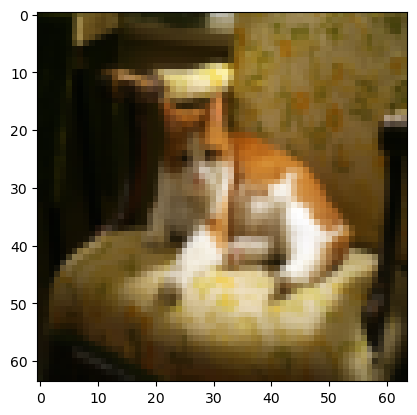

In [5]:
classes = test_dataset["list_classes"][:] # the list of classes
# Visualize sample picture
index = 7
plt.imshow(train_X_orig[:,index].reshape(64,64,3))
print (f"y = {int(train_Y[0, index])}, it's a '{classes[int(train_Y[0, index])].decode('utf-8')}' picture.")

# Theory Hidden Layer Neural Network

### Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} \\ \bold {w_2}  \\ \vdots \\ \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} ---\boldsymbol{\omega_1}^T--- \\ ---\boldsymbol{\omega_2}^T--- \\ \vdots \\ ---\boldsymbol{\omega_{n_l}}^T--- \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1, n_{l-1})}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l, n_{l-1})}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

**Data**
<br>
$
\boldsymbol {X} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(n_0,m)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[L]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(n_L,m)} \color{default}
\\
\boldsymbol {W^{[l]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_l,n_{l-1})} \color{default}
\\
\boldsymbol {b^{[l]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_l,1)} \color{default}
$

$ \boldsymbol{Z^{[l]}} = \boldsymbol{W^{[l]} A^{[l-1]} +b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(n_l,m)=(n_l,n_{l-1})\times(n_{l-1},m)} $
<br>
$ \boldsymbol{Z^{[l]}} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \\
& \boldsymbol{z^{[l]}_{2}} \\ & \boldsymbol{z^{[l]}_{3}} \\ & \vdots \\ & \boldsymbol{z^{[l]}_{n_l}} \end{bmatrix} $

**Algorithm**
<br>
layers_dims=[$n_x,n_{h1},n_{h2},n_{h3},n_y$]
<br>
L=no. of layers including input=len(layers_dims)
<br>
A_prev=X

for $\quad  l=1 \enspace to \enspace L-1:$
<br>
$ \qquad \boldsymbol {Z^{[l]}} = \boldsymbol{W^{[l]}A^{[l-1]}} + \boldsymbol{b^{[l]}} \\
\qquad \boldsymbol {A^{[l]}} = g^{[l]}(\boldsymbol {Z^{[l]}}) \\
\boldsymbol {Z^{[L]}} = \boldsymbol{W^{[L]}A^{[L-1]}} + \boldsymbol{b^{[L]}} \\
\boldsymbol {A^{[L]}} = g^{[L]}(\boldsymbol {Z^{[L]}}) \\
$
cache = ( $A^{[l-1]}, W^{[l]}, b^{[l]}$ ), $Z^{[l]}$

where
<br>
sigmoid $ \rightarrow \displaystyle g^{[l]}=\frac{1}{1+e^{\boldsymbol{-Z^{[l]}}}} \qquad $ 
tanh $ \rightarrow \displaystyle g^{[l]}= \frac{ e^{ \boldsymbol{Z^{[l]}}}-e^{\boldsymbol{-Z^{[l]}}} }{ e^{\boldsymbol{Z^{[l]}}}+e^{\boldsymbol{-Z^{[l]}}} } \qquad $
relu $ \rightarrow max(0,\boldsymbol{Z^{[l]}})$

$
\displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[L]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[L]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} 
$

$
\displaystyle \boldsymbol{dA^{[L]}} = - \bigg( \frac{\bold Y}{\boldsymbol{A^{[L]}}} - \frac{1-\bold Y}{1-\boldsymbol{A^{[L]}}} \bigg)
$

$ \boldsymbol{dZ^{[L]}} = \boldsymbol{dA^{[L]}} * g'^{[L]} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \color{default}\\
\displaystyle 
\boldsymbol{dW^{[L]}}  = \frac{1}{m} \boldsymbol{dZ^{[L]}} \ \boldsymbol{A^{[L-1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle \color{default}
\boldsymbol{db^{[L]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[L]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \color{default} \\
\boldsymbol{dA^{[L-1]}}  = \boldsymbol{W^{[L]}}^T \ \boldsymbol{dZ^{[L]}} $
<br>
for $\quad  p=L-1 \enspace to \enspace 0:$
<br>
$ \qquad \boldsymbol{dZ^{[p]}} = \boldsymbol{dA^{[p]}} * g'^{[p]} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \color{default}\\
\displaystyle 
\qquad \boldsymbol{dW^{[p]}}  = \frac{1}{m} \boldsymbol{dZ^{[p]}} \ \boldsymbol{A^{[p-1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle \color{default}
\qquad \boldsymbol{db^{[p]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[p]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \color{default} \\
\qquad \boldsymbol{dA^{[p-1]}}  = \boldsymbol{W^{[p]}}^T \ \boldsymbol{dZ^{[p]}} $


where
<br>
sigmoid $ \rightarrow g'(\boldsymbol{Z^{[l]}})=g(1-g) \qquad $ 
tanh $ \rightarrow g'(\boldsymbol{Z^{[l]}})=1-g^2 \qquad $
relu $ \rightarrow \boldsymbol{dZ^{[l]}}=dA^{[l]} \enspace dZ[Z<=0]=0 $

# Inialial Code for 2 layer

In [6]:
def epoch(X, Y, W1, b1, W2, b2, learning_rate:float=0.05):
    '''
    Perform one epoch(cycle) of training for NEURON[logistic regression]
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8
    W1 : numpy.ndarray [shape: (#units_in_layer1, #units_in_layer0)]
        matrix containing weights of neurons in first layer; dtype: float64
    b1 : numpy.ndarray [shape: (#units_in_layer1, 1)]
        array containing biases of neurons in first layer; dtype: float64
    W2 : numpy.ndarray [shape: (#units_in_layer2, #units_in_layer1)]
        matrix containing weights of neurons in second layer; dtype: float64
    b2 : numpy.ndarray [shape: (#units_in_layer2, 1)]
        array containing biases of neurons in second layer; dtype: float64
    learning_rate : float (default=0.05)   

    Returns
    -------
    W1 : updated matrix of learned weights by layer1
    b1 : updated array of learned biases by layer1
    W2 : updated matrix of learned weights by layer2
    b2 : updated array of learned biases by layer2
    cost: average loss of samples with input parameters
    '''    
    
    # Forward propagation(FROM X TO A2)
    Z1 = np.matmul(W1,X) + b1    # shape(n_h,m)
    A1 = np.tanh(Z1)             # shape(n_h,m)
    Z2 = np.matmul(W2,A1) + b2   # shape(n_y,m)
    A2 = 1/(1 + np.exp(-Z2))     # shape(n_y,m)

    # Cost function
    m = X.shape[1]    # number of examples
    logprobs = np.log(A2)*Y + np.log(1-A2)*(1-Y)
    cost = - 1/m*np.sum(logprobs)
    cost = float(np.squeeze(cost))  # turns [[17.5]] into 17.5 0D array 

    # Backpropagation: calculate dW1, db1, dW2, db2
    dZ2 = A2 - Y                                          # shape(n_y,m)
    dW2 = 1/m*np.matmul(dZ2,A1.T)                         # shape(n_y,n_h)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)          # shape(n_y,1)
    dZ1 = np.matmul(W2.T,dZ2) * ((1 - np.power(A1, 2)))   # shape(n_h,m)
    dW1 = 1/m*np.matmul(dZ1,X.T)                          # shape(n_h,n_x)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)          # shape(n_h,1)

    # Parameter update
    W1 = W1 - learning_rate*dW1     # shape(n_h,n_x)
    b1 = b1 - learning_rate*db1     # shape(n_h,1)
    W2 = W2 - learning_rate*dW2     # shape(n_y,n_h)
    b2 = b2 - learning_rate*db2     # shape(n_y,1)
        
    return W1, b1, W2, b2, cost

In [ ]:
def nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=7, num_epochs=2000, learning_rate=0.05,
             print_cost=False):
    """
    Single neuron flavoured logistic regression model that runs for num_epochs.
    
    Parameters
    ----------
    train_X : numpy.ndarray [shape: (#features, #samples)]
        matrix of training data; dtype: float64
    train_Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1 for training data; dtype: int64
    test_X : numpy.ndarray [shape: (#features, #samples)]
        matrix of testing data; dtype: float64
    test_Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1 for testing data; dtype: int64
    num_epochs : int (default=2000)
    learning_rate : float (default=0.005)
    print_cost : True/False (default=False)
        if True, it prints cost every 100 epochs and train accuracy

    Returns
    -------
    d: dictionary {train_Y_pred, test_Y_pred, costs, w, b,
         dw, db, learning_rate, num_epochs}
    train_Y_pred : np.ndarray [shape: (1, #samples)]
        containing all predictions (0/1) for the samples in train_X; dtype=int32
    test_Y_pred : np.ndarray [shape: (1, #samples)]
        containing all predictions (0/1) for the samples in test_X; dtype=int32
    costs: list of cost every 100 iterations; dtype=np.float64
    W1 : numpy.ndarray [shape: (#units_in_layer1, #units_in_layer0)]
        matrix containing weights of neurons in first layer; dtype: float64
    b1 : numpy.ndarray [shape: (#units_in_layer1, 1)]
        array containing biases of neurons in first layer; dtype: float64
    W2 : numpy.ndarray [shape: (#units_in_layer2, #units_in_layer1)]
        matrix containing weights of neurons in second layer; dtype: float64
    b2 : numpy.ndarray [shape: (#units_in_layer2, 1)]
        array containing biases of neurons in second layer; dtype: float64
    """
    costs = []
    # layer_sizes
    n_x = train_X.shape[0] # size of input layer
    n_h = n_h        # size of hidden layer
    n_y = train_Y.shape[0] # size of output layer

    ## initialize parameters
    np.random.seed(3)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    ## epochs loop
    for i in range(num_epochs):
        # Cost and gradient calculation 
        W1, b1, W2, b2, cost = epoch(train_X, train_Y, W1, b1, W2, b2, learning_rate=learning_rate)
           
        # Record the costs for every 100 epochs
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost)
        
            # Print the cost every 100 training epochs
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost}")
    
    ## Predict test/train set examples
    Z1 = np.matmul(W1,train_X) + b1         # shape(n_h,m)
    A1 = np.tanh(Z1)                  # shape(n_h,m)
    Z2 = np.matmul(W2,A1) + b2        # shape(n_y,m)
    train_Y_pred = 1/(1 + np.exp(-Z2))          # shape(n_y,m)
    train_Y_pred_out = (train_Y_pred >0.5).astype(int)    # shape(n_y,m)
    Z1 = np.matmul(W1,test_X) + b1         
    A1 = np.tanh(Z1)                 
    Z2 = np.matmul(W2,A1) + b2 
    test_Y_pred = 1/(1 + np.exp(-Z2))
    test_Y_pred_out = (test_Y_pred >0.5).astype(int)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(train_Y_pred_out - train_Y)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(test_Y_pred_out - test_Y)) * 100))

    
    d = { 
         "train_Y_pred_out" : train_Y_pred_out, "test_Y_pred_out" : test_Y_pred_out, 
         "costs": costs, "W1": W1, "b1": b1, "W2": W2, "b2": b2,
         "learning_rate" : learning_rate, "num_epochs": num_epochs}
    
    return d

In [ ]:
nn_model = nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=6, num_epochs=2000, learning_rate=0.01, print_cost=True)

Cost in epochs 1, 0.6917737513964071
Cost in epochs 101, 0.6476465650661254
Cost in epochs 201, 0.6378869210017848
Cost in epochs 301, 0.6156298221213279
Cost in epochs 401, 0.5656183987665014
Cost in epochs 501, 0.4962128181979067
Cost in epochs 601, 0.41865374190669696
Cost in epochs 701, 0.3972941712726383
Cost in epochs 801, 0.36562839401649755
Cost in epochs 901, 0.3185671773895581
Cost in epochs 1001, 0.2759832529311993
Cost in epochs 1101, 0.23671423197012118
Cost in epochs 1201, 0.177940906147459
Cost in epochs 1301, 0.15087968515689335
Cost in epochs 1401, 0.1747730296035831
Cost in epochs 1501, 0.10656557593093727
Cost in epochs 1601, 0.09198326187488517
Cost in epochs 1701, 0.08125421842759799
Cost in epochs 1801, 0.07275113455340673
Cost in epochs 1901, 0.06565450207599823
Cost in epochs 2000, 0.058992353032934465
train accuracy: 99.52153110047847 %
test accuracy: 72.0 %


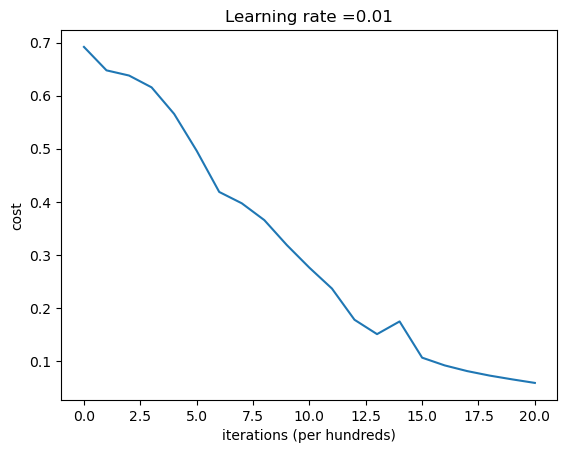

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(nn_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(nn_model["learning_rate"]))
plt.show()

**Interpretation**:
The cost decreasing shows that the parameters are being learned. However, could train the model even more on the training set. Increasing the number of iterations/epochs result in the training accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

# Modified code for two Layer

In [6]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z = np.matmul(W,A_prev) + b
        A = 1/(1+np.exp(-Z))
    
    elif activation == "relu":
        Z = np.matmul(W,A_prev) + b
        A = np.maximum(0,Z)

    elif activation == "tanh":
        Z = np.matmul(W,A_prev) + b
        A = np.tanh(Z)
        
    cache = ((A_prev,W,b), Z)  # linear_cache, activation_cache
    return A, cache

In [19]:
def linear_activation_backward(dA, cache, activation):
    # linear_cache, activation_cache = cache
    (A_prev,W,b), Z = cache
    m = A_prev.shape[1]
    
    if activation == "relu":
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.
        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0
        dW = 1/m*np.matmul(dZ,A_prev.T)
        db = 1/m*np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.matmul(W.T,dZ)
        
    elif activation == "sigmoid":
        a = 1/(1+np.exp(-Z))
        dZ = dA * a * (1-a)
        dW = 1/m*np.matmul(dZ,A_prev.T)
        db = 1/m*np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.matmul(W.T,dZ)

    elif activation == "tanh":
        a = np.tanh(Z)
        dZ = dA * ( 1- np.square(a) )
        dW = 1/m*np.matmul(dZ,A_prev.T)
        db = 1/m*np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.matmul(W.T,dZ)
    
    return dA_prev, dW, db

In [34]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    L = len(layers_dims)  # number of layers in the network
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    np.random.seed(3)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation_L_1)
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation_L)

        # Compute cost
        ## Compute cost from aL and y.
        cost = -1/m*np.sum(np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y))
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation_L)
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation_L_1)
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1; grads['db1'] = db1; grads['dW2'] = dW2; grads['db2'] = db2
        
        # Update parameters.
        for l in range(L-1):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]; b1 = parameters["b1"]; W2 = parameters["W2"]; b2 = parameters["b2"]
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [36]:
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
def predict(X, y, parameters, activation_L_1="relu", activation_L="sigmoid"):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = activation_L_1)
        caches.append(cache)
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = activation_L)
    caches.append(cache)
       
    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))  
    return p


Cost after iteration 0: 0.6917737513964071
Cost after iteration 100: 0.6490741588203142
Cost after iteration 200: 0.6400399083398043
Cost after iteration 300: 0.6247002453351511
Cost after iteration 400: 0.5883612995954974
Cost after iteration 500: 0.5327662993841358
Cost after iteration 600: 0.4650890337484885
Cost after iteration 700: 0.3954949912398891
Cost after iteration 800: 0.3960345803613161
Cost after iteration 900: 0.35118549607755484
Cost after iteration 1000: 0.30562574395836206
Cost after iteration 1100: 0.2643473552220346
Cost after iteration 1200: 0.2266201814670862
Cost after iteration 1300: 0.16290649358301895
Cost after iteration 1400: 0.15101635251246692
Cost after iteration 1500: 0.12801498974728975
Cost after iteration 1600: 0.10789015709994935
Cost after iteration 1700: 0.09414428522668393
Cost after iteration 1800: 0.08298160837990545
Cost after iteration 1900: 0.07326253761442651
Cost after iteration 1999: 0.06570143456019069
Training set:
Accuracy: 0.9952153110

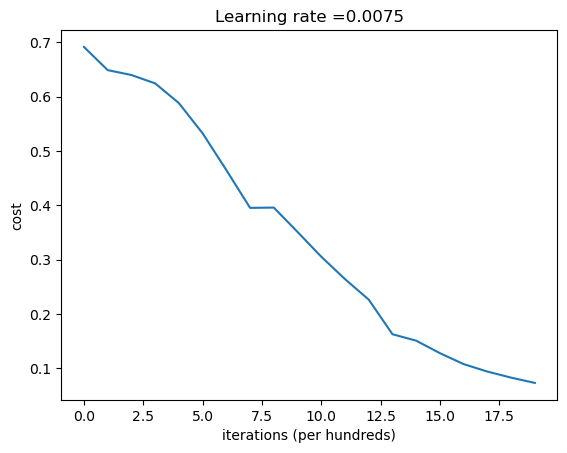

In [38]:
parameters, costs = two_layer_model(train_X, train_Y, [12288,6,1], learning_rate = 0.009, num_iterations = 2000, activation_L_1="tanh", activation_L="sigmoid", print_cost=True)
print("Training set:")
predict(train_X, train_Y, parameters,"tanh","sigmoid")
print(f"Test set:")
predict(test_X, test_Y, parameters,"tanh","sigmoid")    
plot_costs(costs, 0.0075)

# Code for L layers

In [42]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    grads = {}
    costs = []                         # keep track of cost
    m = X.shape[1]                           # number of examples
    L = len(layers_dims) # number of layers in the network

    # Parameters initialization.
    parameters = {}
    np.random.seed(3)   
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        ## Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        caches = []  # tuple(A_prev,W,b) list for each layer
        A = X
        L = len(parameters) // 2                 # number of layers in the neural network
        for l in range(1, L):                    # The for loop starts at 1 because layer 0 is the input
            A_prev = A 
            A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = activation_L_1)
            caches.append(cache)
        AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = activation_L)
        caches.append(cache)
        
        m = Y.shape[1]
        ## Compute cost from aL and y.
        cost = -1/m*np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        
        ## Backward propagation.
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))    # derivative of cost with respect to AL
        # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
        current_cache = caches[L-1]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = activation_L)
        grads["dA" + str(L-1)] = dA_prev_temp
        grads["dW" + str(L)] = dW_temp
        grads["db" + str(L)] = db_temp
        # Loop from l=L-2 to l=0
        for l in reversed(range(L-1)):
            # lth layer: (RELU -> LINEAR) gradients.
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = activation_L_1)
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l+1)] = dW_temp
            grads["db" + str(l+1)] = db_temp
        
        # Update parameters.
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

Cost after iteration 0: 0.6922361923713253
Cost after iteration 100: 0.6418016186323164
Cost after iteration 200: 0.6103617312452706
Cost after iteration 300: 0.5550510991193741
Cost after iteration 400: 0.4872041920446508
Cost after iteration 500: 0.4377864425256307
Cost after iteration 600: 0.41064162370294444
Cost after iteration 700: 0.3709931389110771
Cost after iteration 800: 0.3349653562973116
Cost after iteration 900: 0.2703391206150178
Cost after iteration 1000: 0.21090178211266694
Cost after iteration 1100: 0.3475438623637754
Cost after iteration 1200: 0.19603093823605078
Cost after iteration 1300: 0.11447671393358919
Cost after iteration 1400: 0.09856981434680626
Cost after iteration 1500: 0.07994329752602329
Cost after iteration 1600: 0.06758710977663267
Cost after iteration 1700: 0.05703589514536801
Cost after iteration 1800: 0.04889209945144492
Cost after iteration 1900: 0.042875018410865724
Cost after iteration 1999: 0.037902584580819854
Training set:
Accuracy: 0.9904306

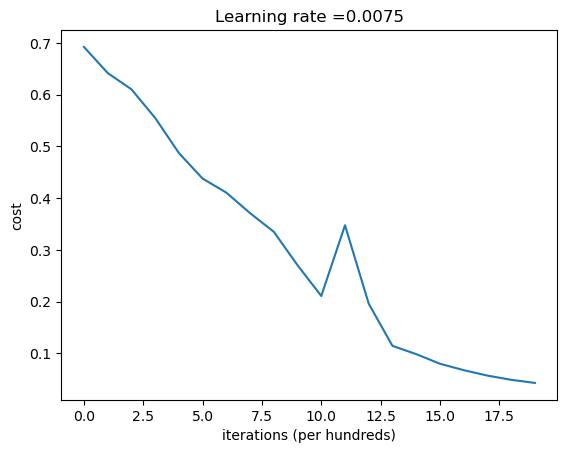

In [48]:
parameters, costs = L_layer_model(train_X, train_Y, [12288,6,1], learning_rate = 0.01, num_iterations = 2000, activation_L_1="relu", activation_L="sigmoid", print_cost=True)
print("Training set:")
predict(train_X, train_Y, parameters,"relu","sigmoid")
print(f"Test set:")
predict(test_X, test_Y, parameters,"relu","sigmoid")    
plot_costs(costs, 0.0075)

**Comment**: Training accuracy is close to 100%. This is a good sanity check: Test accuracy is 72%. The model is clearly overfitting the training data. It can be reduced by regularization technique and using more layers neural network to capture nonlinear complexity better.

# Seeing classified pictures

y = 1,  but y_pred = 1 so predicted that it is a 'cat' picture.


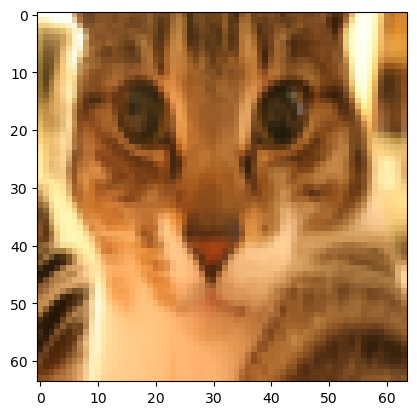

In [8]:
# Example of a picture that is rightly classified.
index = 3
plt.imshow(test_X_orig[:, index].reshape(64,64,3))
print(f"y = {int(test_Y[0,index])},  but y_pred = {int(nn_model['test_Y_pred_out'][0,index])} so predicted that it is a '{classes[int(nn_model['test_Y_pred_out'][0,index])].decode('utf-8')}' picture.")

y = 0, but y_pred = 1 so predicted that it is a 'cat' picture.


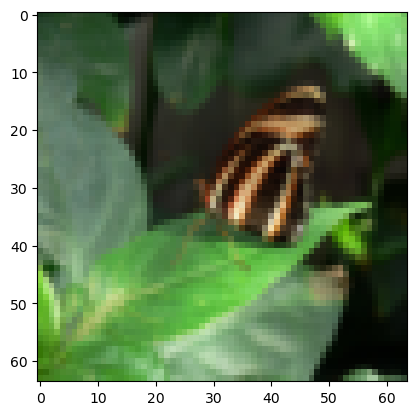

In [14]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_X_orig[:, index].reshape(64,64,3))
print(f"y = {int(test_Y[0,index])}, but y_pred = {int(nn_model['test_Y_pred_out'][0,index])} so predicted that it is a '{classes[int(nn_model['test_Y_pred_out'][0,index])].decode('utf-8')}' picture.")

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly change the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of `learning rates`. Run the cell below. 

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.05

-------------------------------------------------------

Training a model with learning rate: 0.1

-------------------------------------------------------



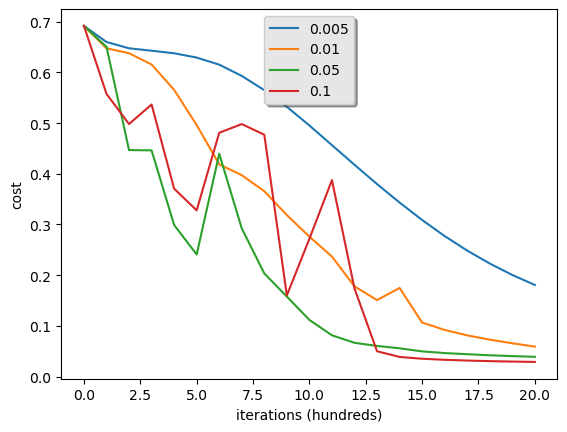

In [11]:
learning_rates = [0.005, 0.01, 0.05, 0.1]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=6, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.1), the cost may oscillate up and down. It may even diverge (in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If model overfits, use other techniques to reduce overfitting.


### Test with your own image ##

Use your own image and see the output of your model. To do that:<br>
1. Add image to this Jupyter Notebook's directory, in the "img" folder.<br>
2. Change your image's name in the following code.<br>
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!<br>

y = 0, neuron algorithm predicts a "non-cat" picture.


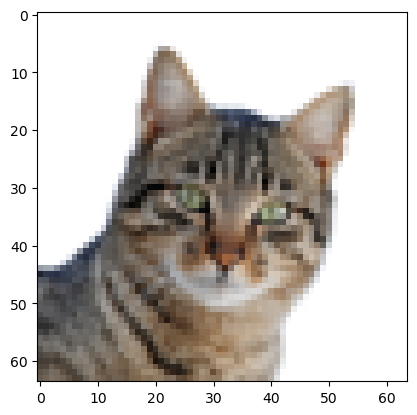

In [12]:
# change this to the name of your image file
my_image = "img/my_image_1.jpg"   

num_px = 64
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

W1=nn_model["W1"]; W2=nn_model["W2"]; b1=nn_model["b1"]; b2=nn_model["b2"]
Z1 = np.matmul(W1,image) + b1         # shape(n_h,m)
A1 = np.tanh(Z1)                  # shape(n_h,m)
Z2 = np.matmul(W2,A1) + b2        # shape(n_y,m)
Y_pred = 1/(1 + np.exp(-Z2))          # shape(n_y,m)
my_image_pred = (Y_pred >0.5).astype(int)    # shape(n_y,m)

print(f"y = {int(my_image_pred.squeeze())}, neuron algorithm predicts a \"" + classes[int(my_image_pred.squeeze())].decode("utf-8") +  "\" picture.")

y = 1, neuron algorithm predicts a "cat" picture.


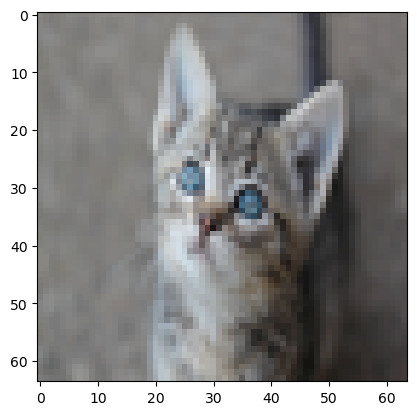

In [13]:
# change this to the name of your image file
my_image = "img/my_image_2.jpg"   

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

W1=nn_model["W1"]; W2=nn_model["W2"]; b1=nn_model["b1"]; b2=nn_model["b2"]
Z1 = np.matmul(W1,image) + b1         # shape(n_h,m)
A1 = np.tanh(Z1)                  # shape(n_h,m)
Z2 = np.matmul(W2,A1) + b2        # shape(n_y,m)
Y_pred = 1/(1 + np.exp(-Z2))          # shape(n_y,m)
my_image_pred = (Y_pred >0.5).astype(int)    # shape(n_y,m)

print(f"y = {int(my_image_pred.squeeze())}, neuron algorithm predicts a \"" + classes[int(my_image_pred.squeeze())].decode("utf-8") +  "\" picture.")